In [5]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

In [6]:
data = pd.read_csv("../task_data.csv")

In [7]:
data.shape
data = data.replace(',', '.', regex=True)

### Approach NO. 1 - Muiltiple features at a Time

In [8]:
X = data.drop(columns=["ID", "Cardiomegaly"])
y = data["Cardiomegaly"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43, test_size=0.2)

print(X_train.shape)
print(X_test.shape)

(29, 12)
(8, 12)


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
clf = LogisticRegression(random_state=42, max_iter=10000)
clf.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [12]:
print(clf.score(X_test_scaled, y_test))

0.75


In [13]:
from sklearn.inspection import PartialDependenceDisplay

In [14]:
from matplotlib import pyplot as plt

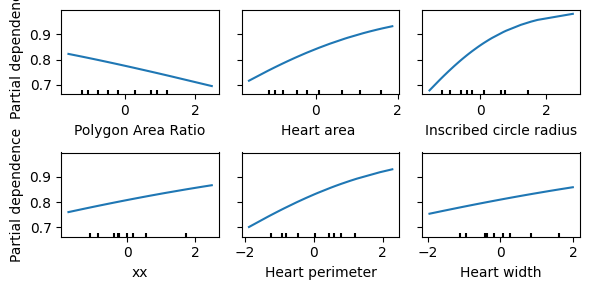

In [15]:
from sklearn.inspection import PartialDependenceDisplay

features_to_plot = ["Polygon Area Ratio", "Heart area ", "Inscribed circle radius",
                    "xx", "Heart perimeter", "Heart width"]

fig, axes = plt.subplots(2, 3, figsize=(6, 3))

PartialDependenceDisplay.from_estimator(
    clf,
    X_train_scaled,
    features=[X.columns.get_loc(f) for f in features_to_plot],
    feature_names=X.columns,
    kind='average',
    ax=axes
)
plt.tight_layout()
plt.show()

In [16]:
from sklearn.metrics import precision_score

In [17]:
y_pred = clf.predict(X_test_scaled)

print(precision_score(y_test, y_pred))

0.7142857142857143


### APPROACH NO. 2 - One Feature at a Time

In [18]:
from sklearn.metrics import roc_auc_score, precision_score

C:\Users\Lukasz\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


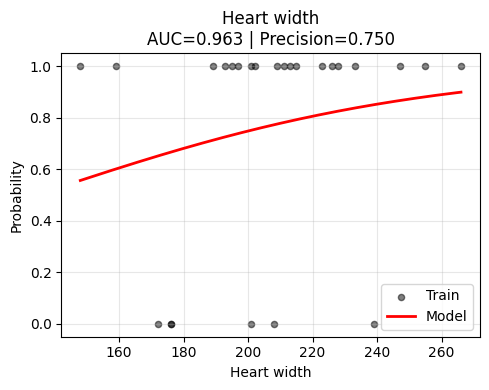

C:\Users\Lukasz\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


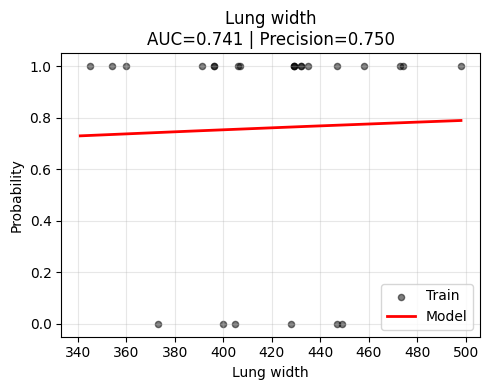

C:\Users\Lukasz\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


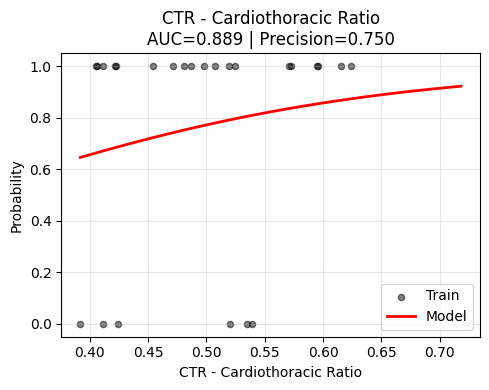

C:\Users\Lukasz\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


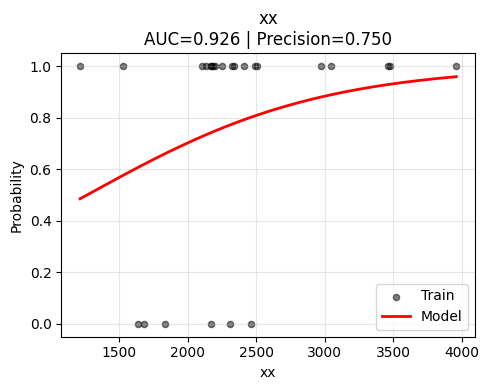

C:\Users\Lukasz\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


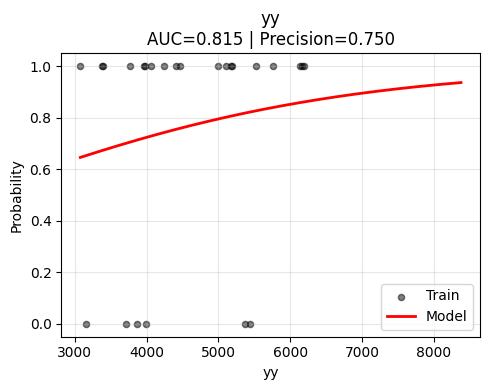

C:\Users\Lukasz\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


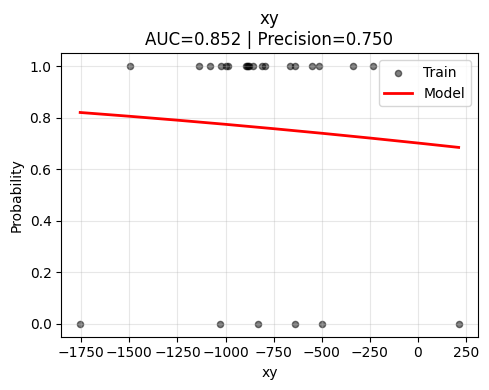

C:\Users\Lukasz\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


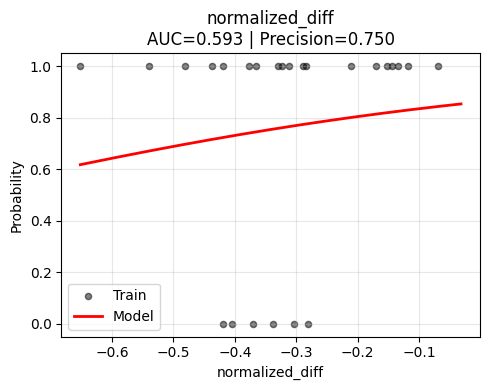

C:\Users\Lukasz\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


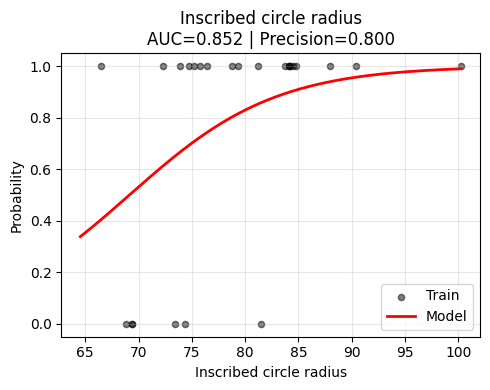

C:\Users\Lukasz\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


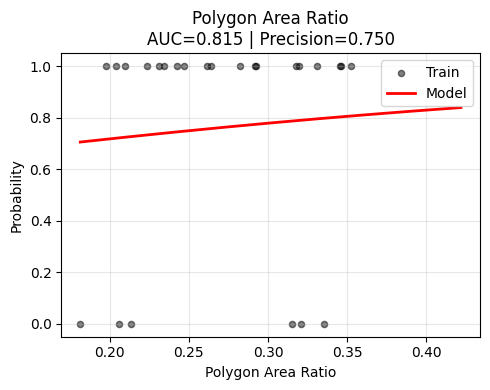

C:\Users\Lukasz\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


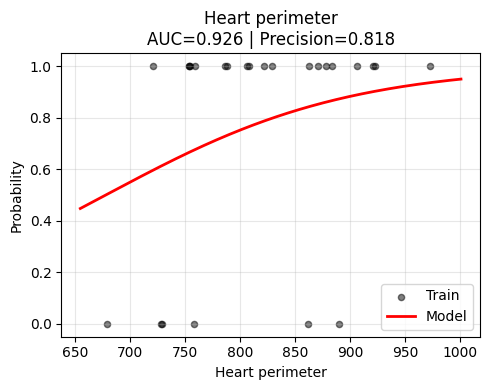

C:\Users\Lukasz\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


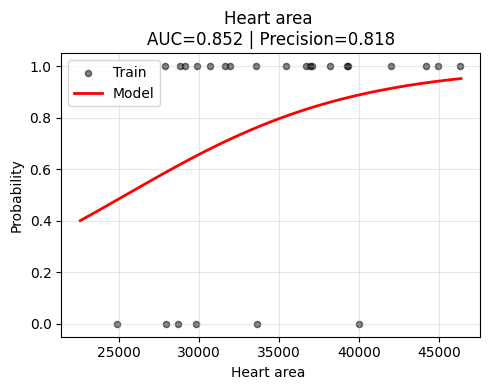

C:\Users\Lukasz\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


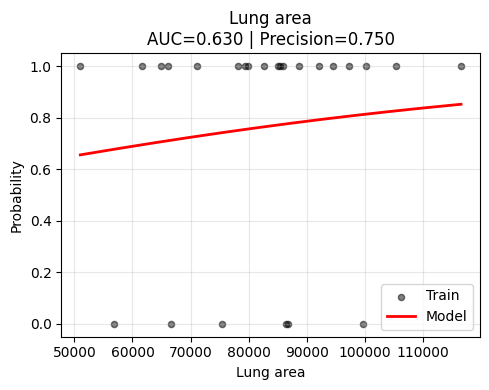

In [19]:
features = [col for col in X.columns if col not in ["ID","Cardiomegaly"]]


for feature in features:
    X_feat = data[[feature]].copy()
    X_feat[feature] = pd.to_numeric(X_feat[feature], errors='coerce')
    X_feat = X_feat.dropna()
    y_feat = data.loc[X_feat.index, "Cardiomegaly"]

    X_train, X_test, y_train, y_test = train_test_split(
        X_feat, y_feat, test_size=0.3, random_state=42, stratify=y_feat
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled  = scaler.transform(X_test)

    clf = LogisticRegression(random_state=42, max_iter=10000)
    clf.fit(X_train_scaled, y_train)

    y_pred      = clf.predict(X_test_scaled)                 
    y_proba     = clf.predict_proba(X_test_scaled)[:, 1]     

    auc = roc_auc_score(y_test, y_proba) if len(np.unique(y_test)) > 1 else 0.5
    prec = precision_score(y_test, y_pred, zero_division=0)

    X_grid = np.linspace(X_feat[feature].min(), X_feat[feature].max(), 300).reshape(-1, 1)
    X_grid_scaled = scaler.transform(X_grid)
    prob = clf.predict_proba(X_grid_scaled)[:, 1]

    plt.figure(figsize=(5, 4))
    plt.scatter(X_train, y_train, color="black", alpha=0.5, s=20, label="Train")
    plt.plot(X_grid, prob, color="red", lw=2, label="Model")
    plt.xlabel(feature)
    plt.ylabel("Probability")
    plt.title(f"{feature}\nAUC={auc:.3f} | Precision={prec:.3f}")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()